# Comparación de filtros Medias Móviles, Savitzky Golay, Butterworth

En este notebook se desarrolla un código que tiene la finalidad de representar gráficamente la comparación de aplicar distintos filtros a una señal PPG generada con el objetivo de entender mejor la teoría explicada en la memoria del proyecto.

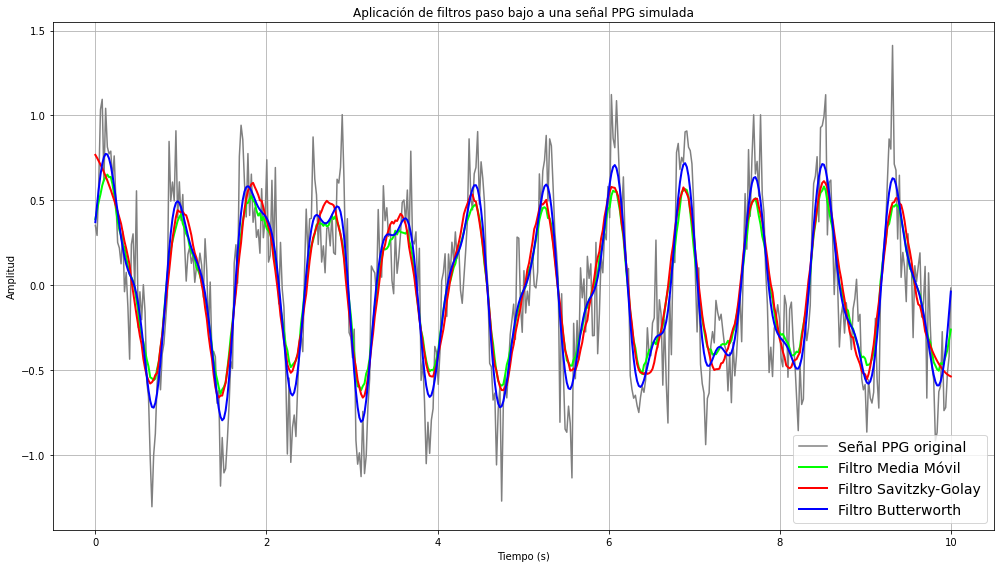

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, savgol_filter

# General señal PPG con una frecuencia baja para mejorar la visibilidad
np.random.seed(0)
t = np.linspace(0, 10, 500)  # Menos puntos para una señal más suave
ppg_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t) + 0.4 * np.sin(2 * np.pi * 2.5 * t) + 0.2 * np.random.randn(len(t))

# Filtro de media móvil
window_size = 15
ppg_moving_avg = np.convolve(ppg_signal, np.ones(window_size)/window_size, mode='same')

# Filtro de Savitzky-Golay
ppg_savgol = savgol_filter(ppg_signal, window_length=31, polyorder=2)

# Filtro Butterworth
b, a = butter(N=2, Wn=0.1, btype='low')
ppg_butter = filtfilt(b, a, ppg_signal)

# Gráfica 
plt.figure(figsize=(14, 8))

plt.plot(t, ppg_signal, label='Señal PPG original', color='grey', linewidth=1.5)
plt.plot(t, ppg_moving_avg, label='Filtro Media Móvil', color='lime', linewidth=2)
plt.plot(t, ppg_savgol, label='Filtro Savitzky-Golay', color='red', linewidth=2)
plt.plot(t, ppg_butter, label='Filtro Butterworth', color='blue', linewidth=2)

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Aplicación de filtros paso bajo a una señal PPG simulada')
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, savgol_filter

# Generar señal PPG simulada (más limpia y clara)
np.random.seed(0)
t = np.linspace(0, 10, 500)
ppg_signal = (
    0.6 * np.sin(2 * np.pi * 1.2 * t) + 
    0.4 * np.sin(2 * np.pi * 2.0 * t) + 
    0.1 * np.random.randn(len(t))  # menos ruido
)

# Filtro de media móvil
window_size = 21
ppg_moving_avg = np.convolve(ppg_signal, np.ones(window_size)/window_size, mode='same')

# Filtro de Savitzky-Golay
ppg_savgol = savgol_filter(ppg_signal, window_length=41, polyorder=3)

# Filtro Butterworth
b, a = butter(N=2, Wn=0.08, btype='low')
ppg_butter = filtfilt(b, a, ppg_signal)

# Gráfica
plt.figure(figsize=(14, 8))
plt.plot(t, ppg_signal, label='Señal PPG original', color='grey', linewidth=1.5, alpha=0.8)
plt.plot(t, ppg_moving_avg, label='Filtro Media Móvil', color='lime', linewidth=2)
plt.plot(t, ppg_savgol, label='Filtro Savitzky-Golay', color='red', linewidth=2)
plt.plot(t, ppg_butter, label='Filtro Butterworth', color='blue', linewidth=2)

plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Comparativa de filtros aplicados a una señal PPG simulada')
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# Guardar como imagen PNG
plt.savefig(r'C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Código\filtros_ppg.png', dpi=300)
plt.close()
